In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('D:\ML_workspace\Fake_news_Project\datasets\\train.csv')
df_test = pd.read_csv('D:\ML_workspace\Fake_news_Project\datasets\\test.csv')

## Working on Training Data

In [3]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df_train = df_train.fillna(' ')
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
df_train['title'] = df_train.title.astype('str')

## Preprocessing our Training data

In [8]:
df_train.shape

(20800, 5)

In [9]:
X = df_train.drop('label', axis=1)
y = df_train['label']

In [10]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
X.shape

(20800, 4)

In [12]:
type(y), y.shape

(pandas.core.series.Series, (20800,))

In [13]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

corpus = []
for i in range(0, len(X)):
    words = re.sub('[^a-zA-Z]',' ', X['title'][i])
    words = words.lower()
    words = words.split()
    stemmed = [ps.stem(word) for word in words if not word in stopwords.words('english')]
    final = ' '.join(stemmed)
    corpus.append(final)

In [14]:
corpus[3]

'civilian kill singl us airstrik identifi'

## One Hot Encoding

In [15]:
import tensorflow as tf
tf.__version__

C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

'1.14.0'

In [16]:

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [17]:
# I will set the vocabulary size as 5000

voc_size = 5000

In [18]:
one_hot_rep = [one_hot(words, voc_size) for words in corpus]

In [19]:
one_hot_rep[0]

[4002, 357, 1667, 4453, 868, 4338, 3322, 4372, 4136, 1492]

In [20]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [21]:
one_hot_rep[1]

[2329, 3463, 2515, 928, 3233, 27, 4660]

In [22]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

## Padding and Embedding

In [23]:
max_len = 20

embedded_words = pad_sequences(one_hot_rep, padding = 'pre', maxlen = max_len )

In [24]:
embedded_words[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2329, 3463, 2515,  928, 3233,   27, 4660])

In [25]:
len(embedded_words)

20800

In [26]:
type(embedded_words), embedded_words.shape

(numpy.ndarray, (20800, 20))

In [27]:
type(y) , y.shape

(pandas.core.series.Series, (20800,))

## Tensorflow Model

In [28]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(5000, embedding_vector_features, input_length=20))

model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_final = np.array(embedded_words)
y_final = np.array(y)

## Now for testing how our model is performing on the training data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final,y_final, test_size = 0.33, random_state=42 )


In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13936, 20), (6864, 20), (13936,), (6864,))

In [33]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=64)

Train on 13936 samples, validate on 6864 samples
Epoch 1/10
13936/13936 [==============================] - 6s 439us/sample - loss: 0.3196 - acc: 0.8615 - val_loss: 0.1904 - val_acc: 0.9256
Epoch 2/10
13936/13936 [==============================] - 5s 377us/sample - loss: 0.1365 - acc: 0.9478 - val_loss: 0.1838 - val_acc: 0.9258
Epoch 3/10
13936/13936 [==============================] - 5s 378us/sample - loss: 0.1001 - acc: 0.9627 - val_loss: 0.2152 - val_acc: 0.9269
Epoch 4/10
13936/13936 [==============================] - 5s 380us/sample - loss: 0.0697 - acc: 0.9764 - val_loss: 0.2341 - val_acc: 0.9207
Epoch 5/10
13936/13936 [==============================] - 5s 391us/sample - loss: 0.0522 - acc: 0.9836 - val_loss: 0.2712 - val_acc: 0.9248
Epoch 6/10
13936/13936 [==============================] - 5s 385us/sample - loss: 0.0350 - acc: 0.9892 - val_loss: 0.3214 - val_acc: 0.9213
Epoch 7/10
13936/13936 [==============================] - 5s 370us/sample - loss: 0.0238 - acc: 0.9932 - val_lo

In [34]:
y_pred=model.predict_classes(X_test)

In [35]:
y_pred.shape

(6864, 1)

In [36]:
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [38]:
matrix = confusion_matrix(y_test, y_pred)

In [39]:
score = accuracy_score(y_test, y_pred)

In [40]:
# Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

 Accuracy Score : 0.9141899766899767
Confusion matrix, without normalization


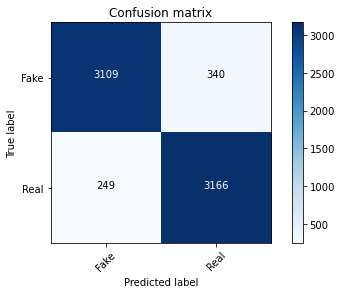

In [41]:
print(" Accuracy Score : {}".format(score))
plot_confusion_matrix(matrix, classes=['Fake', 'Real'])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3449
           1       0.90      0.93      0.91      3415

    accuracy                           0.91      6864
   macro avg       0.91      0.91      0.91      6864
weighted avg       0.91      0.91      0.91      6864



## We are getting an accuracy of 92% on the training set

## Now we will Work on the test set

In [43]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [44]:
df_test.shape

(5200, 4)

In [82]:
Test_id

0       20800
1       20801
2       20802
3       20803
4       20804
        ...  
5195    25995
5196    25996
5197    25997
5198    25998
5199    25999
Name: id, Length: 5200, dtype: int64

In [45]:
df_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [46]:
df_test = df_test.fillna(' ')

In [47]:
df_test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [49]:
ps = PorterStemmer()

corpus_test = []
for i in range(0, len(df_test)):
    words_test = re.sub('[^a-zA-Z]', ' ', df_test['title'][i])
    words_test = words_test.lower()
    words_test = words_test.split()
    
    stemmed_test = [ps.stem(worx) for worx in words_test if not worx in stopwords.words('english')]
    final_stem_test = ' '.join(stemmed_test)
    corpus_test.append(final_stem_test)

In [50]:
one_hot_enc_test = [one_hot(words, 5000) for words in corpus_test]

embedded_docs_test = pad_sequences(one_hot_enc_test, padding='pre', maxlen = 20)

In [83]:
print(embedded_docs_test)

[[   0    0    0 ...  727 2085 3805]
 [   0    0    0 ... 2964  812  513]
 [   0    0    0 ...  792 1013 2990]
 ...
 [   0    0    0 ...  727 2085 3805]
 [   0    0    0 ... 3566   41 2256]
 [   0    0    0 ...  727 2085 3805]]


## Making the predictions

In [84]:
array_emb = np.array(embedded_docs_test)

y_test_pred = model.predict_classes(array_emb)

In [85]:
y_test_pred.shape

(5200, 1)

In [86]:
val = list()

for i in y_test_pred:
    val.append(i[0])

## Making the final Submissions

In [88]:
Test_id = df_test['id']

our_csv = pd.DataFrame({'id':Test_id, 'label':val})

our_csv.head()


,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [89]:
type(our_csv.id[0]), type(our_csv.label[0])

(numpy.int64, numpy.int64)

In [92]:
our_csv.to_csv('../final_submit.csv', index=False)
print('Submission CSV is ready!')


Submission CSV is ready!
